In [1]:
# 03_metrics_comparison.ipynb
# 📊 Comparing Team Efficiency Metrics

# 🛠 Requirements:
# - pandas, matplotlib, seaborn (install via `pip install pandas matplotlib seaborn`)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

DATA_DIR = "./data"

# Configure plots
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,8]

In [2]:
# 📂 Load team-level advanced season stats for a recent year

stats_path = os.path.join(DATA_DIR, "advanced_season_stats", "2023.csv")
stats = pd.read_csv(stats_path)

# Filter to FBS teams
teams = stats[stats['conference'].notnull()].copy()

# Drop rows with missing metric values
teams = teams.dropna(subset=[
    'offense_ppa', 'offense_successRate', 'offense_explosiveness',
    'defense_ppa', 'defense_successRate', 'defense_explosiveness'
])

print(f"{len(teams)} teams with complete data")

134 teams with complete data


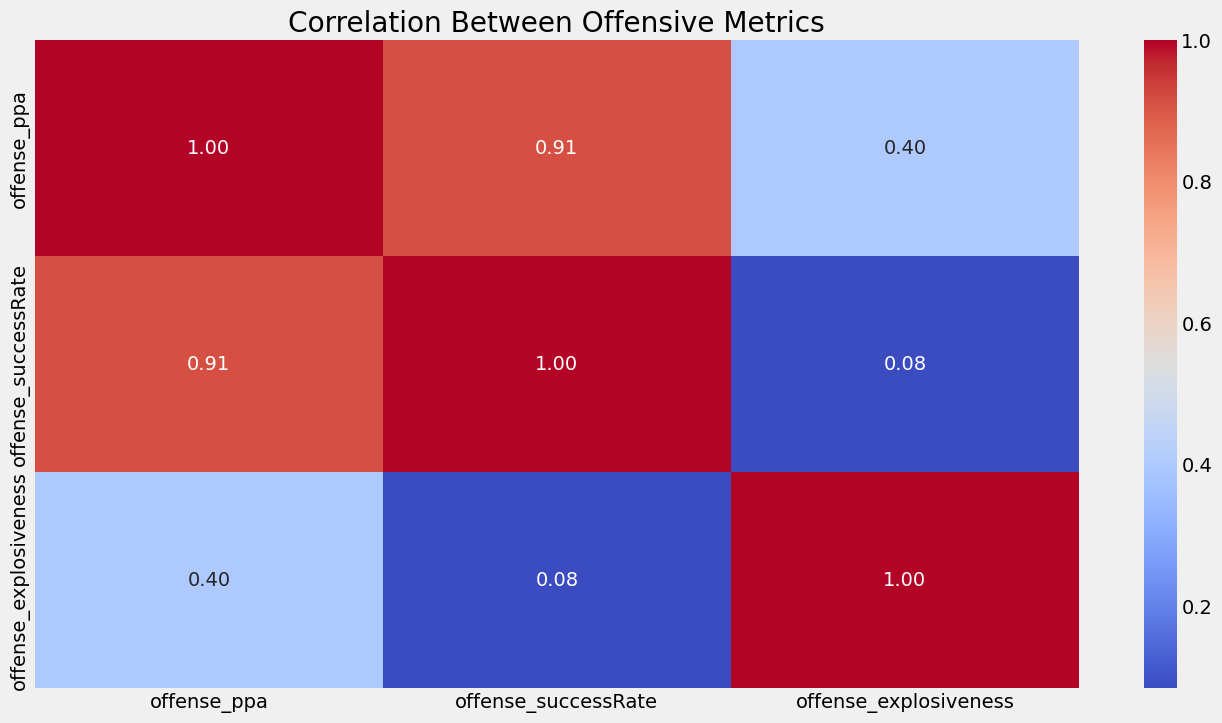

In [3]:
# 🧠 Let's look at correlations between key offensive metrics

off_metrics = teams[['offense_ppa', 'offense_successRate', 'offense_explosiveness']]
off_corr = off_metrics.corr()

sns.heatmap(off_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Offensive Metrics")
plt.show()

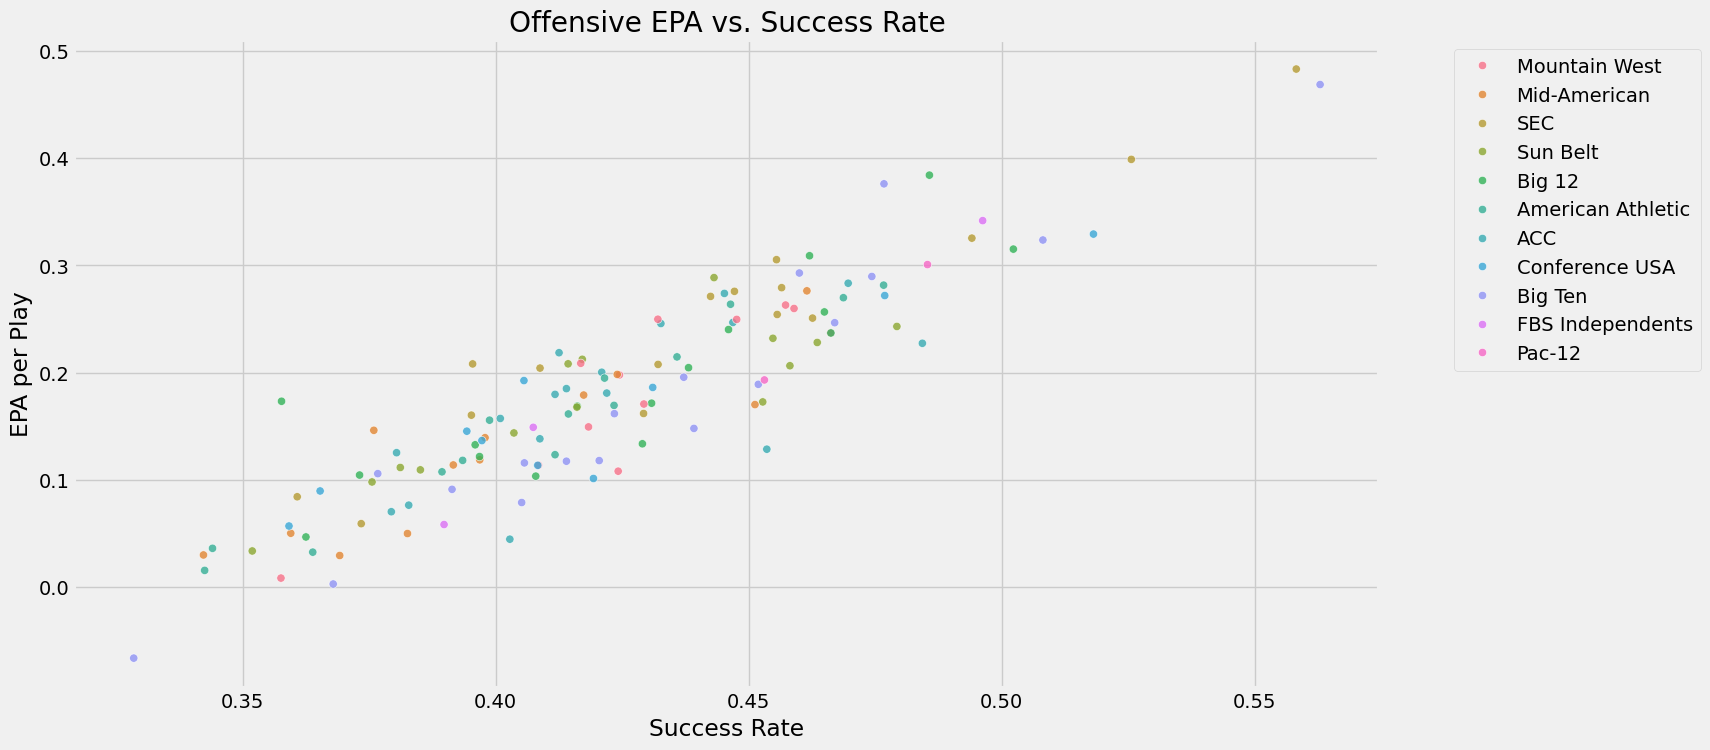

In [4]:
# 🔍 EPA vs. Success Rate (Offense)
sns.scatterplot(
    data=teams,
    x='offense_successRate',
    y='offense_ppa',
    hue='conference',
    alpha=0.8
)
plt.title("Offensive EPA vs. Success Rate")
plt.xlabel("Success Rate")
plt.ylabel("EPA per Play")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [5]:
# 🎯 Highlight teams with high explosiveness but low success rate

threshold_explosive = teams['offense_explosiveness'].quantile(0.85)
threshold_success = teams['offense_successRate'].quantile(0.40)

boom_bust = teams[
    (teams['offense_explosiveness'] >= threshold_explosive) &
    (teams['offense_successRate'] <= threshold_success)
]

boom_bust[['team', 'conference', 'offense_ppa', 'offense_successRate', 'offense_explosiveness']]

,team,conference,offense_ppa,offense_successRate,offense_explosiveness
7,Arkansas State,Sun Belt,0.143754,0.403636,1.351243
42,Iowa State,Big 12,0.173289,0.357713,1.545996
49,Kentucky,SEC,0.208112,0.395480,1.450252
82,Old Dominion,Sun Belt,0.111544,0.381182,1.385912
102,Temple,American Athletic,0.107503,0.389423,1.341856
129,Western Kentucky,Conference USA,0.192582,0.405618,1.359311


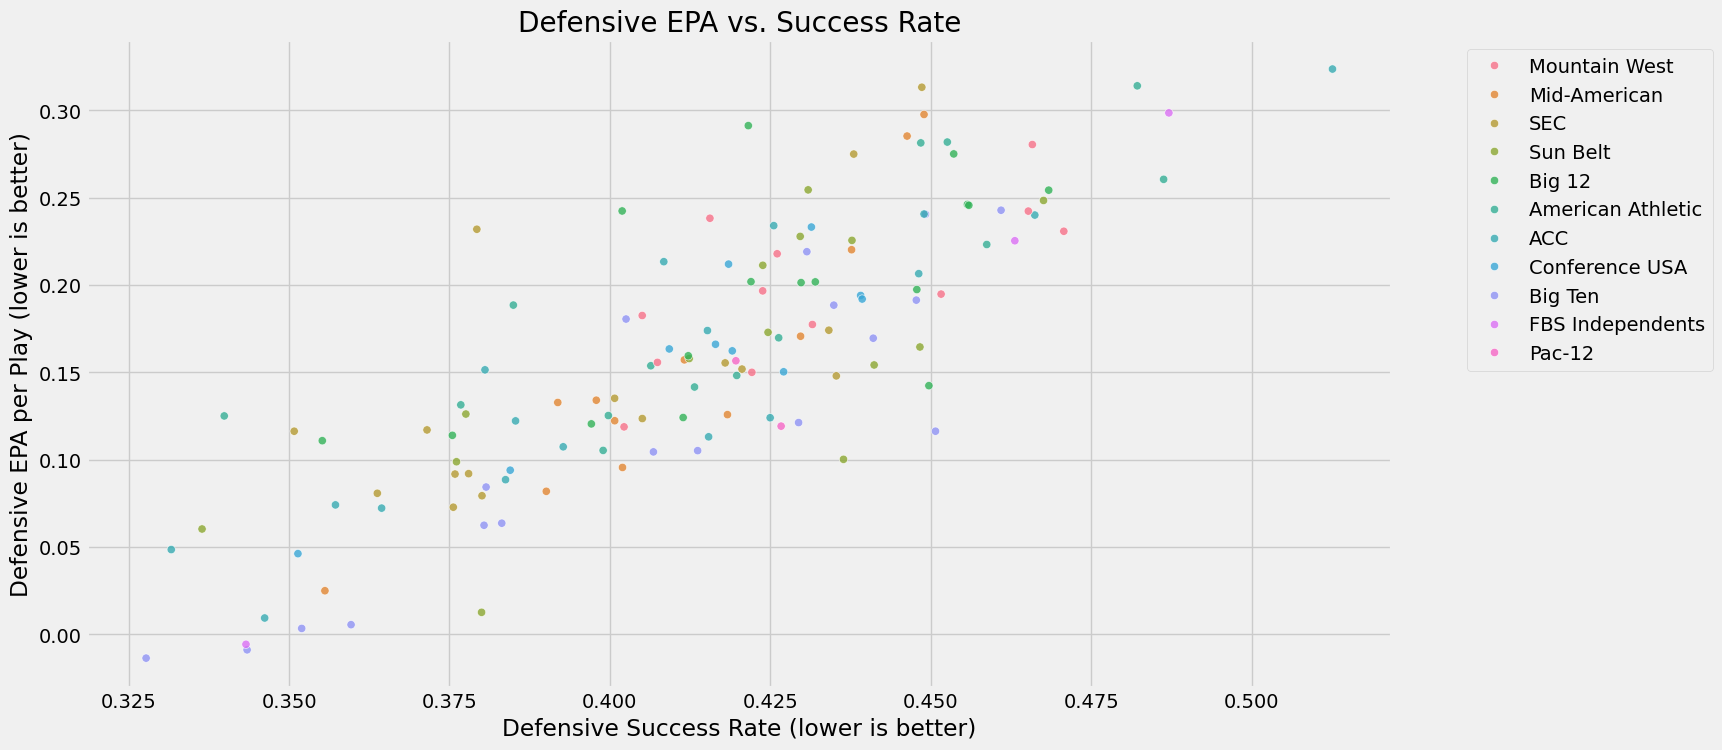

In [6]:
# 📊 Defensive profile: PPA vs. Success Rate

sns.scatterplot(
    data=teams,
    x='defense_successRate',
    y='defense_ppa',
    hue='conference',
    alpha=0.8
)
plt.title("Defensive EPA vs. Success Rate")
plt.xlabel("Defensive Success Rate (lower is better)")
plt.ylabel("Defensive EPA per Play (lower is better)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# Let's repeat the process, adding some additional metrics

# Filter to FBS teams
teams = stats[stats['conference'].notnull()].copy()

# Drop rows with missing metric values
teams = teams.dropna(subset=[
    'offense_passingPlays_ppa', 'offense_rushingPlays_ppa', 'offense_havoc_frontSeven', 'offense_successRate', 'offense_explosiveness',
    'defense_passingPlays_ppa', 'defense_rushingPlays_ppa', 'defense_havoc_frontSeven', 'defense_successRate', 'defense_explosiveness'
])

print(f"{len(teams)} teams with complete data")

134 teams with complete data


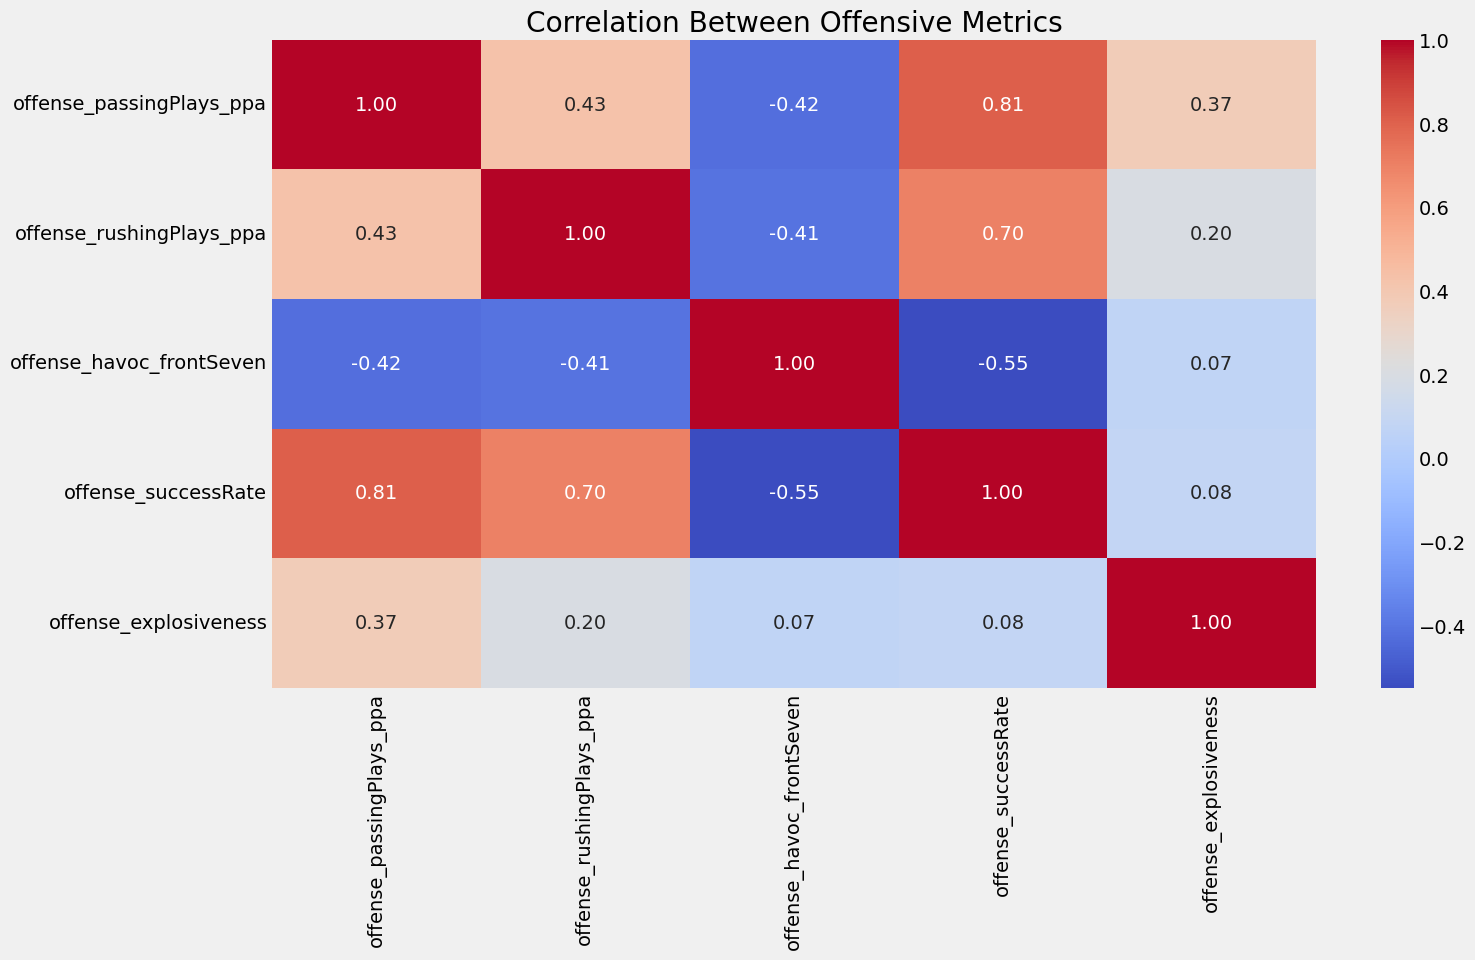

In [ ]:
# Re-run the correlation analysis with new metrics

off_metrics = teams[[ 'offense_passingPlays_ppa', 'offense_rushingPlays_ppa', 'offense_havoc_frontSeven', 'offense_successRate', 'offense_explosiveness']]
off_corr = off_metrics.corr()

sns.heatmap(off_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Offensive Metrics")
plt.show()

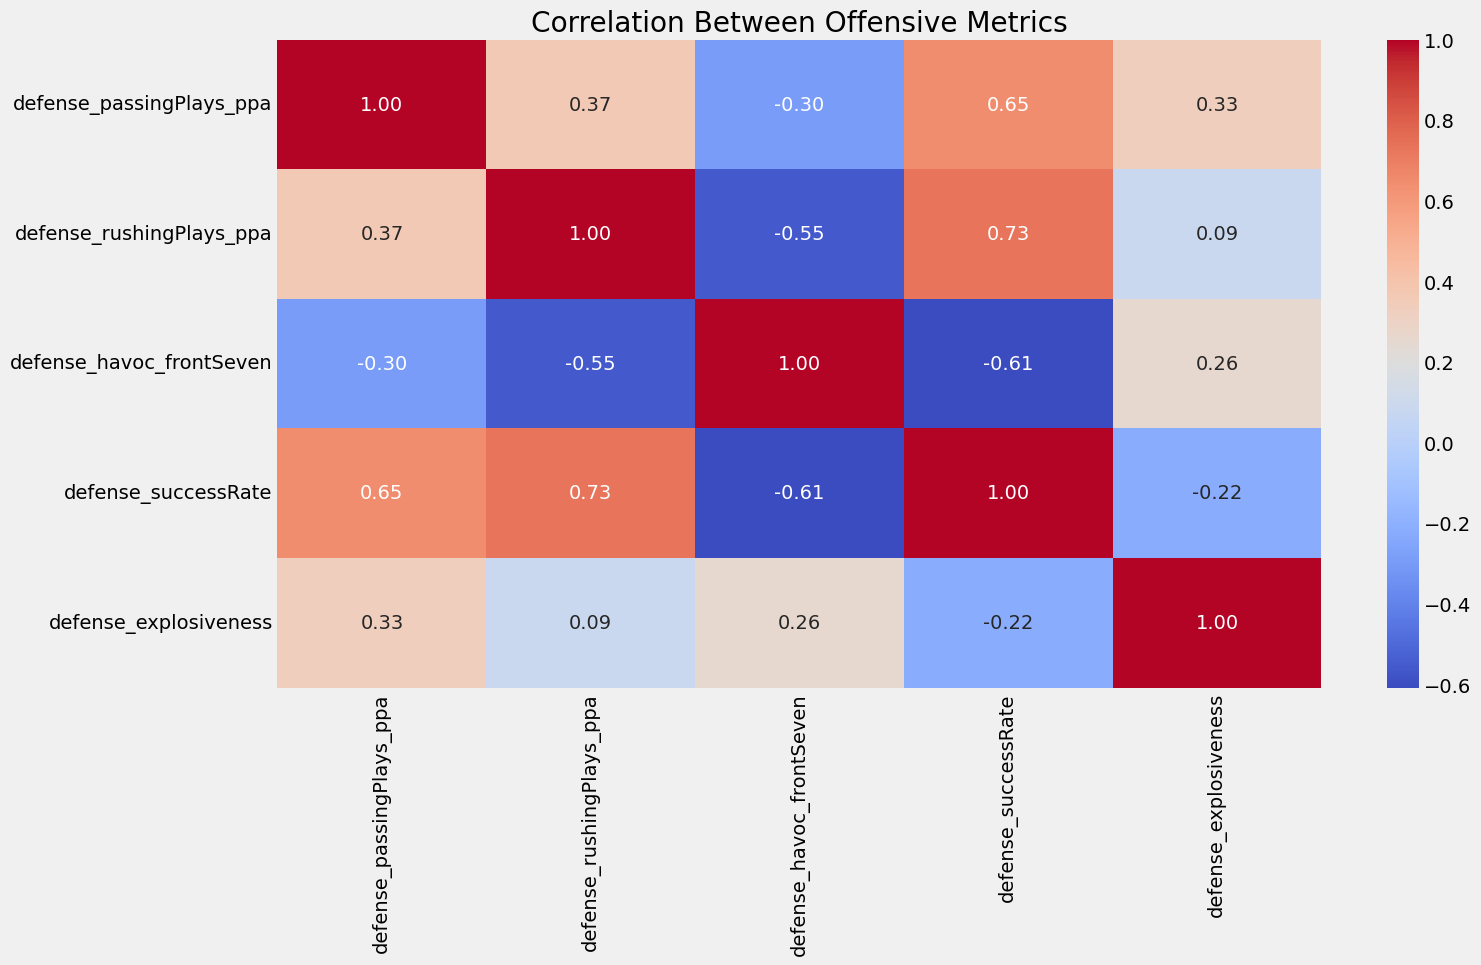

In [12]:
# Repeat again for defensive metrics

off_metrics = teams[['defense_passingPlays_ppa', 'defense_rushingPlays_ppa', 'defense_havoc_frontSeven', 'defense_successRate', 'defense_explosiveness']]
off_corr = off_metrics.corr()

sns.heatmap(off_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Offensive Metrics")
plt.show()

In [ ]:
# ✅ Summary

# In this notebook, you:
# - Compared offensive and defensive metrics
# - Identified correlations and outliers
# - Found "boom-or-bust" style offenses
# - Visualized efficiency tradeoffs

# 🧪 Try This:
# - Build clusters of teams based on their profiles (KMeans, t-SNE)
# - Create matchup visualizations using opponent stats
# - Track metric evolution over time using weekly data (advanced_game_stats/)